# Yelp Data Exploration, Processing and Feature Engineering

All of the data is from Yelp's Academic Dataset and is structured as five different json files, which I have converted to .csv files. Below I go through each file and extract relevant features. 

In [39]:
import pandas as pd
import re
from collections import Counter
import numpy as np
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

## Business Data

In [40]:
business = pd.read_csv('csv/yelp_academic_dataset_business.csv')
business.head()

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,attributes.Good For.latenight,...,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale
0,False,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,False,...,average,NaN,casual,NaN,True,[],NaN,False,NaN,False
1,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,10:00,NaN,NaN,NaN,NaN,10:00,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Create a counter object of all possible categories. 

In [42]:
business.categories[0]

"['Fast Food', 'Restaurants']"

In [41]:
category_list = business.categories
total_categories = []
category_by_business = []

for line in category_list:
    # Extract the text (example in cell above)
    names = re.findall('(?<=\')[a-zA-Z\s]*?(?=\')', line)
    category_by_business.append(names)
    total_categories.extend(names)

counter = Counter(total_categories)

In [43]:
total_categories[:5]

['Fast Food', 'Restaurants', 'Nightlife', 'Auto Repair', 'Automotive']

In [44]:
category_by_business[:5]

[['Fast Food', 'Restaurants'],
 ['Nightlife'],
 ['Auto Repair', 'Automotive'],
 ['Active Life', 'Mini Golf', 'Golf'],
 ['Shopping',
  'Home Services',
  'Internet Service Providers',
  'Mobile Phones',
  'Professional Services',
  'Electronics']]

Flatten each business' category list to a single category by choosing the most popular category

In [45]:
common_categories = counter.most_common()
most_common_category = []
for line in category_by_business:
    count_list = []
    if line:
        for cat in line:
            count_list.append(counter[cat])
        biggest = line[np.argmax(count_list)]
        most_common_category.append(biggest)
    else:
        most_common_category.append('')

Create a new feature with this category

In [46]:
business['category_main'] = most_common_category

Choose only the important features from the business dataset

In [47]:
business_short = business[['business_id','name','category_main','city','state', 
                           'latitude','longitude','review_count','stars']]
business_short.head()

,business_id,name,category_main,city,state,latitude,longitude,review_count,stars
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,Restaurants,Dravosburg,PA,40.354327,-79.900706,4,4.5
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,Nightlife,Dravosburg,PA,40.350553,-79.886814,4,3.5
2,3eu6MEFlq2Dg7bQh8QbdOg,Joe Cislo's Auto,Automotive,Dravosburg,PA,40.350956,-79.889059,3,5.0
3,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,Active Life,Bethel Park,PA,40.354116,-80.014660,5,2.5
4,HZdLhv6COCleJMo7nPl-RA,Verizon,Shopping,Pittsburgh,PA,40.357620,-80.059980,5,2.5


Pickle this dataframe if necessary

In [ ]:
with open('pickle/business.pickle', 'wb') as handle:
    pickle.dump(business_short, handle)

with open('pickle/business.pickle', 'rb') as handle:
    business = pickle.load(handle)

Look at the histogram for review counts for each Yelp rating

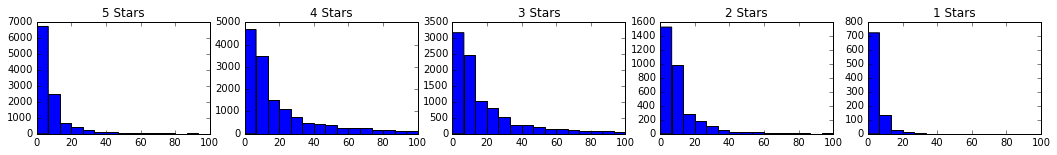

In [48]:
stars5 = business.groupby(by='stars').get_group(5)
stars4 = business.groupby(by='stars').get_group(4)
stars3 = business.groupby(by='stars').get_group(3)
stars2 = business.groupby(by='stars').get_group(2)
stars1 = business.groupby(by='stars').get_group(1)

plt.figure(figsize=(18,2))
plt.subplot(1,5,1)
plt.hist(stars5.review_count, bins= 15, range=(0,100))
plt.xlim(0, 100)
plt.title('5 Stars')
plt.subplot(1,5,2)
plt.hist(stars4.review_count, bins=15, range=(0,100))
plt.xlim(0, 100)
plt.title('4 Stars')
plt.subplot(1,5,3)
plt.hist(stars3.review_count, bins= 15, range=(0,100))
plt.xlim(0, 100)
plt.title('3 Stars')
plt.subplot(1,5,4)
plt.hist(stars2.review_count, bins= 15, range=(0,100))
plt.xlim(0, 100)
plt.title('2 Stars')
plt.subplot(1,5,5)
plt.hist(stars1.review_count, bins= 15, range=(0,100))
plt.xlim(0, 100)
plt.title('1 Stars')

## Check-In Data

In [49]:
checkin = pd.read_csv('csv/yelp_academic_dataset_checkin.csv')
checkin.head()

,checkin_info.9-0,checkin_info.9-1,checkin_info.9-2,checkin_info.9-3,checkin_info.9-4,checkin_info.9-5,checkin_info.9-6,checkin_info.20-2,checkin_info.20-3,checkin_info.20-0,...,checkin_info.6-1,checkin_info.6-0,checkin_info.3-1,checkin_info.18-6,checkin_info.18-5,checkin_info.18-4,checkin_info.18-3,checkin_info.18-2,checkin_info.18-1,checkin_info.18-0
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find the total number of check-ins for each business by summing across all time intervals

In [50]:
num_total_checkins = checkin.sum(axis=1)
checkin['total'] = num_total_checkins

Extract most important features from check-in data

In [51]:
checkin_short = checkin[['business_id','total']]
checkin_short.head()

,business_id,total
0,cE27W9VPgO88Qxe4ol6y_g,9.0
1,mVHrayjG3uZ_RLHkLj-AMg,23.0
2,KayYbHCt-RkbGcPdGOThNg,55.0
3,b12U9TFESStdy7CsTtcOeg,5.0
4,QoDa50dc7g62xciFygXB9w,5.0


Pickle dataframe if necessary

In [ ]:
with open('pickle/checkin.pickle', 'wb') as handle:
    pickle.dump(checkin_short, handle)

## Tips Data

In [52]:
tip = pd.read_csv('csv/yelp_academic_dataset_tip.csv')
tip.head()

,user_id,text,business_id,likes,date,type
0,-6rEfobYjMxpUWLNxszaxQ,Don't waste your time.,cE27W9VPgO88Qxe4ol6y_g,0,2013-04-18,tip
1,EZ0r9dKKtEGVx2CdnowPCw,Your GPS will not allow you to find this place...,mVHrayjG3uZ_RLHkLj-AMg,1,2013-01-06,tip
2,xb6zEQCw9I-Gl0g06e1KsQ,Great drink specials!,KayYbHCt-RkbGcPdGOThNg,0,2013-12-03,tip
3,QawZN4PSW7ng_9SP7pjsVQ,"Friendly staff, good food, great beer selectio...",KayYbHCt-RkbGcPdGOThNg,0,2015-07-08,tip
4,MLQre1nvUtW-RqMTc4iC9A,Beautiful restoration.,1_lU0-eSWJCRvNGk78Zh9Q,0,2015-10-25,tip


Find the number of tips for each business - this will be the only feature I use from this data

In [53]:
tip_by_business = tip.groupby(by='business_id')
num_tips_per_business = tip_by_business.size()

Reformat into standard dataframe with business id as its own column

In [54]:
tipsdf = pd.DataFrame(num_tips_per_business)
tipsdf['business_id'] = tipsdf.index
tipsdf.reset_index(level=0, drop=True, inplace=True)
tipsdf.rename(columns={0: 'num_tips'}, inplace=True)
tipsdf.head()

,num_tips,business_id
0,7,--1emggGHgoG6ipd_RMb-g
1,1,--4Pe8BZ6gj57VFL5mUE8g
2,23,--5jkZ3-nUPZxUvtcbr8Uw
3,21,--BlvDO_RG2yElKu9XA1_g
4,1,--Dl2rW_xO8GuYBomlg9zw


Pickle if necessary

In [ ]:
with open('pickle/tip.pickle', 'wb') as handle:
    pickle.dump(num_tips_per_business, handle)

## Review Data

In [55]:
review = pd.read_csv('csv/yelp_academic_dataset_review.csv')
review.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


Sum up all the types of votes for each business

In [56]:
review_votes_by_business = review.groupby(by='business_id')[['votes.cool','votes.funny','votes.useful']].sum()
review_votes_by_business['total_votes'] = review_votes_by_business.sum(axis=1)

Find the average time between reviews for each business

In [58]:
reviews_by_business = review.groupby(by='business_id')
business_ids = set(review.business_id)
avg_time_btw_reviews = []

for i in tqdm(business_ids):
    group = reviews_by_business.get_group(i)
    dates = sorted(group.date.values)
    diffs = []
    if len(dates) > 1:
        for d in range(len(dates)-1):
            days_btw = (pd.to_datetime(dates[d+1]) - pd.to_datetime(dates[d]))
            diffs.append(days_btw.components.days)
        mean = sum(diffs) / len(diffs)
        avg_time_btw_reviews.append((i,mean))
    else:
        continue

100%|██████████| 77079/77079 [08:32<00:00, 150.40it/s]


In [59]:
avg_time_btw_reviews[:5]

[('SNpVV5viJ2aPylP6bkAx8Q', 90),
 ('_qvxFHGbnbrAPeWBVifJEQ', 96),
 ('vuki3_Z5ryc8VmgUTkVF_g', 232),
 ('s5yzZITWU_RcJzWOgjFecw', 28),
 ('Ym_tcWP7kAQ_0u_gsjTUQQ', 93)]

Find the average length of reviews

In [60]:
avg_review_length = []
for i in tqdm(business_ids):
    group = reviews_by_business.get_group(i)
    review_texts = group.text.values
    lengths = []
    if len(review_texts) > 0:
        for r in review_texts:
            lengths.append(len(r))
        mean = sum(lengths) / len(lengths)
        avg_review_length.append((i,mean))
    else:
        continue

100%|██████████| 77079/77079 [00:35<00:00, 2184.98it/s]


In [61]:
avg_review_length[:5]

[('SNpVV5viJ2aPylP6bkAx8Q', 493),
 ('_qvxFHGbnbrAPeWBVifJEQ', 427),
 ('vuki3_Z5ryc8VmgUTkVF_g', 299),
 ('s5yzZITWU_RcJzWOgjFecw', 754),
 ('Ym_tcWP7kAQ_0u_gsjTUQQ', 445)]

Combine all selected features into one dataframe

In [62]:
r1 = pd.DataFrame(avg_time_btw_reviews, columns=['business_id','avg_time_btw_reviews'])
r2 = pd.DataFrame(avg_review_length, columns=['business_id','avg_review_length'])
r3 = r1.merge(r2, right_on='business_id', left_on='business_id')
review_short = r3.merge(review_votes_by_business, left_on = 'business_id', right_index=True)
review_short.head()

,business_id,avg_time_btw_reviews,avg_review_length,votes.cool,votes.funny,votes.useful,total_votes
0,SNpVV5viJ2aPylP6bkAx8Q,90,493,15,15,20,50
1,_qvxFHGbnbrAPeWBVifJEQ,96,427,3,10,9,22
2,vuki3_Z5ryc8VmgUTkVF_g,232,299,0,1,0,1
3,s5yzZITWU_RcJzWOgjFecw,28,754,36,23,78,137
4,Ym_tcWP7kAQ_0u_gsjTUQQ,93,445,2,1,4,7


Pickle if necessary

In [ ]:
with open('pickle/review.pickle', 'wb') as handle:
    pickle.dump(review_short, handle)

## User Data

In [63]:
user = pd.read_csv('csv/yelp_academic_dataset_user.csv')
pd.options.display.max_columns = 100 
user.head()

,yelping_since,compliments.plain,review_count,friends,compliments.cute,compliments.writer,fans,compliments.note,type,compliments.hot,compliments.cool,compliments.profile,average_stars,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,25.0,108,"['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...",15.0,9.0,70,20.0,user,48.0,78.0,8.0,4.14,3.0,"[2005, 2006]",Russel,18kPq7GPye-YQ3LyKyAZPw,245,NaN,167,14.0,11.0,280
1,2004-10,959.0,1274,"['18kPq7GPye-YQ3LyKyAZPw', '4U9kSBLuBDU391x6bx...",206.0,327.0,1179,611.0,user,1094.0,1642.0,116.0,3.66,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199
2,2004-10,89.0,442,"['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...",23.0,24.0,100,83.0,user,101.0,145.0,9.0,3.60,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483
3,2004-10,NaN,11,"['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...",2.0,NaN,2,NaN,user,NaN,NaN,NaN,4.64,NaN,[],Ken,fHtTaujcyKvXglE33Z5yIw,5,NaN,1,NaN,NaN,11
4,2004-10,2.0,66,"['rpOyqD_893cqmDAtJLbdog', 'HDQixQ-WZEV0LVPJlI...",2.0,2.0,4,1.0,user,1.0,1.0,NaN,3.80,1.0,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,NaN,11,NaN,NaN,34


Create and extract features from the User data for a given business, including: <br/>
1. the average number of compliments given to a business' reviewers
2. the average number of a business' reviewers who are elite
3. the average number of friends had by a business' reviewers
4. the average number of reviews written (on Yelp) by a business' reviewers 
5. the average number of fans had by a business' reviewers

In [ ]:
user_avg_num_compliments = []
user_num_elite = []
user_avg_num_friends = []
user_avg_review_count = []
user_avg_num_fans = []

comp_list = ['compliments.plain', 'compliments.cute', 'compliments.writer', 'compliments.note', 
            'compliments.hot', 'compliments.cool', 'compliments.profile', 'compliments.more', 
            'compliments.list', 'compliments.photos','compliments.funny']

for i in tqdm(business_ids):
    group = reviews_by_business.get_group(i)
    users = group.user_id.values
    
    compliments = []
    elite = []
    friends = []
    reviews = []
    fans = []
    
    for u in users:
        data = user[user.user_id == u]
        
        # Number of compliments
        try:
            compliments.append(int(data[comp_list].sum(axis=1).values[0]))
        except:
            pass
        
        # If elite
        date_of_review = group[group.user_id == u].date.values[0][:4]
        elite_dates_raw = data.elite.values[0].strip('[]').split(',')
        elite_dates = []
        for s in elite_dates_raw:
            s = s.strip()
            elite_dates.append(s)
        elite.append(date_of_review in elite_dates)
        
        # Number of friends
        friends_data_raw = data.friends.values[0].strip('[]').split(',')
        friends.append(len(friends_data_raw))
        
        # Number of reviews
        reviews.append(int(data.review_count.values[0]))
        
        # Number of fans 
        fans.append(int(data.fans.values[0]))
    
    user_num_elite.append((i, sum(elite)))
    if len(compliments) > 0:
        user_avg_num_compliments.append((i, sum(compliments)/len(compliments)))
    if len(friends) > 0:
        user_avg_num_friends.append((i, sum(friends)/len(friends)))
    if len(reviews) > 0:
        user_avg_review_count.append((i, sum(reviews)/len(reviews)))
    if len(fans) > 0:
        user_avg_num_fans.append((i, sum(fans)/len(fans)))

In [ ]:
print user_avg_num_compliments[:5]
print '------'
print user_num_elite[:5]
print '------'
print user_avg_num_friends[:5]
print '------'
print user_avg_review_count[:5]
print '------'
print user_avg_num_fans[:5]

Put all features into a single dataframe

In [ ]:
u1 = pd.DataFrame(user_avg_num_compliments, columns=['business_id','user_avg_num_compliments'])
u2 = pd.DataFrame(user_num_elite, columns=['business_id','user_num_elite'])
u3 = pd.DataFrame(user_avg_num_friends, columns=['business_id','user_avg_num_friends'])
u4 = pd.DataFrame(user_avg_review_count, columns=['business_id','user_avg_review_count'])
u5 = pd.DataFrame(user_avg_num_fans, columns=['business_id','user_avg_num_fans'])

u6 = u1.merge(u2, left_on='business_id', right_on='business_id')
u7 = u6.merge(u3, left_on='business_id', right_on='business_id')
u8 = u7.merge(u4, left_on='business_id', right_on='business_id')
u9 = u8.merge(u5, left_on='business_id', right_on='business_id')

Pickle if necessary

In [ ]:
with open('pickle/user.pickle', 'wb') as handle:
    pickle.dump(u9, handle)

Example output from above code:

In [64]:
with open('pickle/user.pickle', 'rb') as handle:
    user_features = pickle.load(handle)
    
user_features.head()

,business_id,user_avg_num_compliments,user_num_elite,user_avg_num_friends,user_avg_review_count,user_avg_num_fans
0,SNpVV5viJ2aPylP6bkAx8Q,79,4,30,129,3
1,_qvxFHGbnbrAPeWBVifJEQ,37,5,8,78,2
2,vuki3_Z5ryc8VmgUTkVF_g,1,0,1,9,0
3,s5yzZITWU_RcJzWOgjFecw,151,6,18,61,2
4,Ym_tcWP7kAQ_0u_gsjTUQQ,67,3,18,80,3


## Photo Data

In [65]:
with open('json/photo_id_to_business_id.json','r') as f:
    json = f.read()
json_list = json.split('}')

Count the number of photos for each business

In [66]:
counter = defaultdict(int)
for photo in json_list:
    bi = re.findall('(?<="business_id":").*?(?=","caption")', photo)
    if bi:
        counter[bi[0]] += 1

Reformat into standard dataframe where business is its its own column

In [67]:
photos = pd.DataFrame.from_dict(counter, orient='index')
photos.rename(columns= {0: 'num_photos'}, inplace=True)
photos['business_id'] = photos.index
photos.reset_index(level=0, drop=True, inplace=True)
photos.head()

,num_photos,business_id
0,10,OlpyplEJ_c_hFxyand_Wxw
1,1,_qvxFHGbnbrAPeWBVifJEQ
2,6,s5yzZITWU_RcJzWOgjFecw
3,1,icGm4nN43m2fz0iWu7dYCQ
4,8,osixLFHD7OKEUy2HSbN-7Q


## Combine all dataframes
Below is a series of merge operations and some reformatting so that the result is a single dataframe (**total**) containing all the chosen features from the Yelp dataset

In [72]:
total = business_short.merge(checkin_short, how='outer', left_on='business_id', right_on='business_id')
total = total.merge(tipsdf, how='outer', left_on='business_id', right_on='business_id')
total = total.merge(review_short, how='outer', left_on='business_id', right_on='business_id')
total = total.merge(user_features, how='outer', left_on='business_id', right_on='business_id')
total = total.merge(photos, how='outer', left_on='business_id', right_on='business_id')
total.head()

,business_id,name,category_main,city,state,latitude,longitude,review_count,stars,total,num_tips,avg_time_btw_reviews,avg_review_length,votes.cool,votes.funny,votes.useful,total_votes,user_avg_num_compliments,user_num_elite,user_avg_num_friends,user_avg_review_count,user_avg_num_fans,num_photos
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,Restaurants,Dravosburg,PA,40.354327,-79.900706,4,4.5,NaN,NaN,593.0,323.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,24.0,0.0,1.0
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,Nightlife,Dravosburg,PA,40.350553,-79.886814,4,3.5,NaN,NaN,128.0,443.0,0.0,0.0,0.0,0.0,27.0,1.0,10.0,60.0,2.0,NaN
2,3eu6MEFlq2Dg7bQh8QbdOg,Joe Cislo's Auto,Automotive,Dravosburg,PA,40.350956,-79.889059,3,5.0,NaN,NaN,474.0,419.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,11.0,0.0,NaN
3,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,Active Life,Bethel Park,PA,40.354116,-80.014660,5,2.5,9.0,1.0,172.0,693.0,0.0,0.0,2.0,2.0,13.0,1.0,6.0,46.0,1.0,NaN
4,HZdLhv6COCleJMo7nPl-RA,Verizon,Shopping,Pittsburgh,PA,40.357620,-80.059980,5,2.5,NaN,NaN,218.0,419.0,9.0,5.0,9.0,23.0,527.0,1.0,181.0,185.0,9.0,NaN


Rename the total checkin count column to be more descriptive

In [73]:
total.rename(columns={'total': 'num_checkins'}, inplace=True)

Fill NaNs with 0 where it makes sense

In [74]:
total['num_checkins'].fillna(value=0, inplace=True)
total['num_tips'].fillna(value=0, inplace=True)
total['num_photos'].fillna(value=0, inplace=True)

Change review_count data type from string to integer

In [76]:
pd.to_numeric(total['review_count'])

0         4
1         4
2         3
3         5
4         5
5        20
6         3
7        21
8         7
9         4
10        3
11        5
12        3
13        3
14        8
15        4
16        3
17        4
18        7
19       58
20        6
21        7
22        7
23        4
24       10
25        3
26        5
27        8
28        9
29        4
         ..
77415    18
77416     5
77417     7
77418     3
77419    73
77420     3
77421    12
77422    17
77423     4
77424     4
77425    19
77426    25
77427     4
77428    10
77429    14
77430     7
77431     6
77432     4
77433    22
77434    20
77435    21
77436    13
77437     3
77438     9
77439     5
77440     4
77441     8
77442    15
77443     6
77444     9
Name: review_count, dtype: int64

In [77]:
total.head()

,business_id,name,category_main,city,state,latitude,longitude,review_count,stars,num_checkins,num_tips,avg_time_btw_reviews,avg_review_length,votes.cool,votes.funny,votes.useful,total_votes,user_avg_num_compliments,user_num_elite,user_avg_num_friends,user_avg_review_count,user_avg_num_fans,num_photos
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,Restaurants,Dravosburg,PA,40.354327,-79.900706,4,4.5,0.0,0.0,593.0,323.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,24.0,0.0,1.0
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,Nightlife,Dravosburg,PA,40.350553,-79.886814,4,3.5,0.0,0.0,128.0,443.0,0.0,0.0,0.0,0.0,27.0,1.0,10.0,60.0,2.0,0.0
2,3eu6MEFlq2Dg7bQh8QbdOg,Joe Cislo's Auto,Automotive,Dravosburg,PA,40.350956,-79.889059,3,5.0,0.0,0.0,474.0,419.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,11.0,0.0,0.0
3,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,Active Life,Bethel Park,PA,40.354116,-80.014660,5,2.5,9.0,1.0,172.0,693.0,0.0,0.0,2.0,2.0,13.0,1.0,6.0,46.0,1.0,0.0
4,HZdLhv6COCleJMo7nPl-RA,Verizon,Shopping,Pittsburgh,PA,40.357620,-80.059980,5,2.5,0.0,0.0,218.0,419.0,9.0,5.0,9.0,23.0,527.0,1.0,181.0,185.0,9.0,0.0


## Further Data Processing 

### Add city name to data given latitude and longitude

In [78]:
states = total.groupby(by='state').size()
coordinates = total[['latitude', 'longitude']]
print states.sort_values(ascending=False)

state
AZ     32615
NV     21233
NC      6162
QC      4942
PA      3754
EDH     3206
WI      2802
BW      1048
IL       737
ON       474
SC       271
MLN      147
RP        18
ELN       12
FIF        5
CA         3
SCB        3
TX         2
AR         1
MN         1
HAM        1
KHL        1
MA         1
NM         1
NTH        1
NW         1
OR         1
AL         1
dtype: int64


In [79]:
import math

city_names = ['Edinburgh, UK', 'Karlsruhe, Germany', 'Montreal, Canada', 'Waterloo, Canada',
         'Pittsburgh, PA', 'Charlotte, NC', 'Urbana-Champaign, IL', 'Phoenix, AZ',
         'Las Vegas, NV', 'Madison, WI']

cities_coor = [(55.953252, -3.188267), (49.006890, 8.403653), 
              (45.501689, -73.567256), (43.464258, -80.520410),
              (40.440625, -79.995886), (35.227087, -80.843127),
              (40.110588, -88.207270), (33.448377, -112.074037),
              (36.169941, -115.139830), (43.073052, -89.401230)]

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [80]:
itter = coordinates.iterrows()
cities = []

for coor in itter:
    origin = (coor[1][0], coor[1][1])
    dists = []
    for dest in cities_coor:
        d = distance(origin, dest)
        dists.append(d)
    cities.append(city_names[np.argmin(dists)])

In [81]:
total['city'] = cities
total.head()

,business_id,name,category_main,city,state,latitude,longitude,review_count,stars,num_checkins,num_tips,avg_time_btw_reviews,avg_review_length,votes.cool,votes.funny,votes.useful,total_votes,user_avg_num_compliments,user_num_elite,user_avg_num_friends,user_avg_review_count,user_avg_num_fans,num_photos
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,Restaurants,"Pittsburgh, PA",PA,40.354327,-79.900706,4,4.5,0.0,0.0,593.0,323.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,24.0,0.0,1.0
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,Nightlife,"Pittsburgh, PA",PA,40.350553,-79.886814,4,3.5,0.0,0.0,128.0,443.0,0.0,0.0,0.0,0.0,27.0,1.0,10.0,60.0,2.0,0.0
2,3eu6MEFlq2Dg7bQh8QbdOg,Joe Cislo's Auto,Automotive,"Pittsburgh, PA",PA,40.350956,-79.889059,3,5.0,0.0,0.0,474.0,419.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,11.0,0.0,0.0
3,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,Active Life,"Pittsburgh, PA",PA,40.354116,-80.014660,5,2.5,9.0,1.0,172.0,693.0,0.0,0.0,2.0,2.0,13.0,1.0,6.0,46.0,1.0,0.0
4,HZdLhv6COCleJMo7nPl-RA,Verizon,Shopping,"Pittsburgh, PA",PA,40.357620,-80.059980,5,2.5,0.0,0.0,218.0,419.0,9.0,5.0,9.0,23.0,527.0,1.0,181.0,185.0,9.0,0.0


### Flatten Categories According to Yelp's Category Structure

In [82]:
cats = pd.read_csv('csv/yelp_categories.csv', header=None, names=['sub_cat','parent_cat'])

Parse the .json file suppplied by Yelp that contains each category and its parent category, if there is one

In [83]:
itter = cats.iterrows()

cat_dict = defaultdict(str)
for row in itter:
    try:
        sub = row[1].sub_cat.split('(')[0].strip()
        par = row[1].parent_cat.split('(')[0].strip()
        cat_dict[sub] = par
    except:
        continue

Delete Real Estate from dictionary as this appears twice - once as a parent category and once as a child. Here we are removing the parent entry

In [84]:
del cat_dict['Real Estate']

Replace the category column in the dataframe using the parent-child dictionary. Now only the parent categories are present, helping to reduce the number of categories

In [85]:
total.replace({'category_main':cat_dict}, inplace=True)

### Reduce the Yelp star ratings to single integer buckets of 1-5

In [86]:
star_dict = {1.0: 1, 1.5: 1, 2.0: 2, 2.5: 2, 3.0: 3, 3.5: 3, 4.0: 4, 4.5: 4, 5.0: 5}
total['stars_int'] = total['stars'].map(star_dict)

### Visualize numerical features by star count to uncover relationship between features and star count

In [88]:
# Create numeric feature list
tot_feature_list = total.columns.tolist()
numeric_feature_list = [f for f in tot_feature_list if f not in ['stars', 'business_id','name','category_main',
                                                                'city','state','latitude','longitude', 'stars_int']]
print numeric_feature_list

['review_count', 'num_checkins', 'num_tips', 'avg_time_btw_reviews', 'avg_review_length', 'votes.cool', 'votes.funny', 'votes.useful', 'total_votes', 'user_avg_num_compliments', 'user_num_elite', 'user_avg_num_friends', 'user_avg_review_count', 'user_avg_num_fans', 'num_photos']


In [99]:
# Find averages by star count for each feature
stars = total.groupby(by='stars_int')
avg_across_cols = []
for col in numeric_feature_list:
    avgs = []
    for i in range(1,6):
        group = stars.get_group(i)
        avgs.append(group[col].mean())
    avg_across_cols.append(avgs)

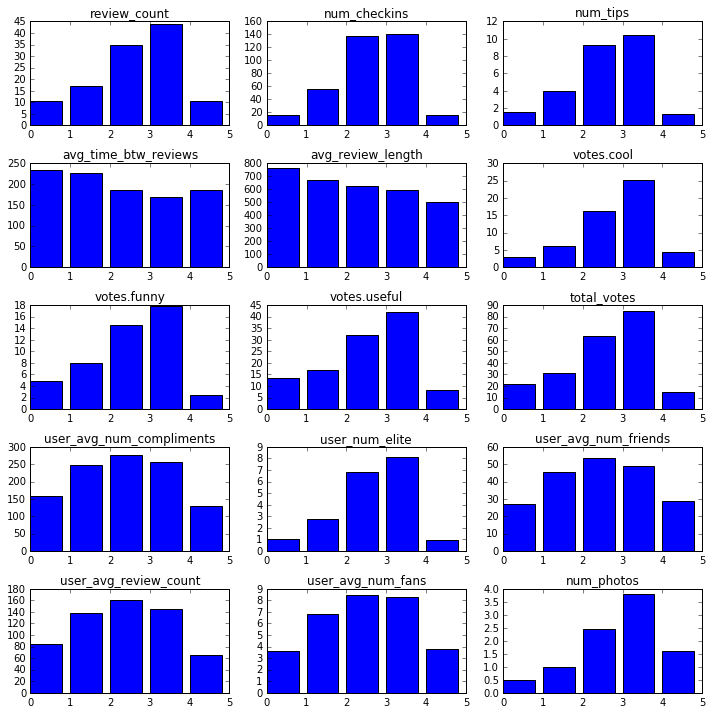

In [100]:
# Visualize 
xs = range(0,5)

plt.figure(figsize=(10,10))

for i in range(len(numeric_feature_list)):
    plt.subplot(5,3,i+1)
    plt.bar(xs, avg_across_cols[i])
    plt.title(numeric_feature_list[i])

plt.tight_layout()

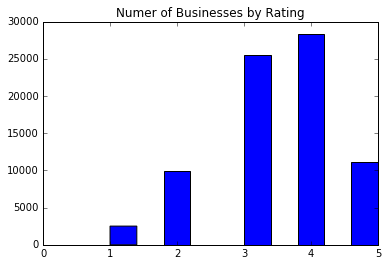

In [103]:
plt.hist(total['stars_int'])
plt.xlim(0,5)
plt.title('Numer of Businesses by Rating')

### Eliminate 5 Star Businesses

It appears that businesses with 5 stars on Yelp exhibit an abnormal trends. I believe the reason for this is that 5 star businesses do not always reflect a high quality business because the high rating is due to having only 1 or 2 reviews. I have confirmed this in the cell below, which shows that 40% of businesses with 5 stars have less than 5 reviews. Thus I am eliminating 5 star businesses from my dataset. 

In [105]:
set(total.stars_int)

{1, 2, 3, 4, 5}

In [104]:
len(stars5[stars5.review_count < 5])/float(len(stars5))*100

40.961590115498254

In [106]:
total = total[total.stars_int != 5]

In [107]:
set(total.stars_int)

{1, 2, 3, 4}

Eliminate NaNs

In [115]:
total.dropna(inplace=True)

## Visualize the data once more

Numerical Features:

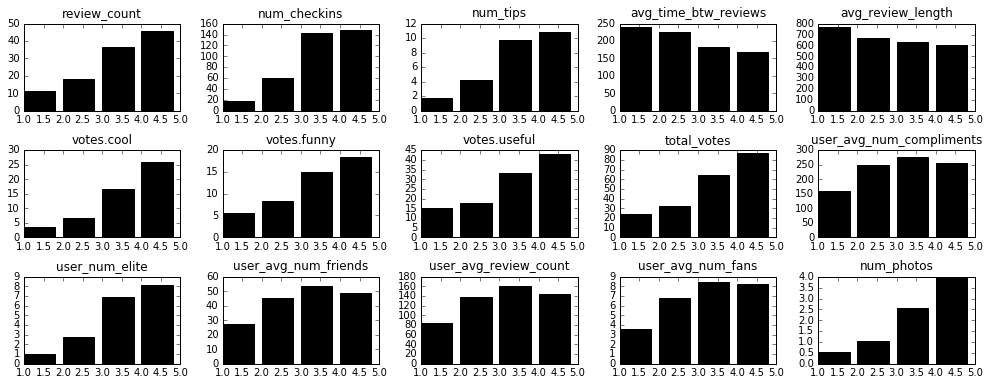

In [116]:
stars = total.groupby(by='stars_int')
avg_across_cols = []

for col in numeric_feature_list:
    avgs = []
    for i in range(1,5):
        group = stars.get_group(i)
        avgs.append(group[col].mean())
    avg_across_cols.append(avgs)

xs = range(1,5)
plt.figure(figsize=(14,7))

for i in range(len(numeric_feature_list)):
    plt.subplot(4,5,i+1)
    plt.bar(xs, avg_across_cols[i], color='black')
    plt.title(numeric_feature_list[i], y=1.02)

plt.tight_layout()

plt.savefig('fig/features_by_stars')

Number of Businesses Per City:

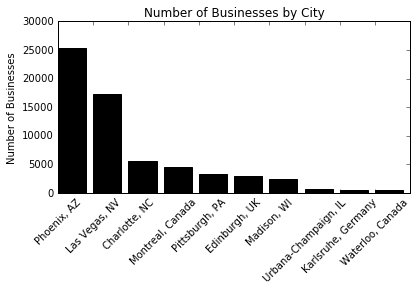

In [117]:
cities = total.groupby(by='city').size().sort_values(ascending=False)

plt.bar(range(len(cities.values)),cities.values, color='black')
plt.xticks(range(len(cities.values)),cities.index, rotation=45)
plt.title('Number of Businesses by City')
plt.ylabel('Number of Businesses')

ax = plt.gca()
pos1 = ax.get_position()
pos2 = [pos1.x0 + 0.02, pos1.y0 + 0.19, pos1.width + 0.04, pos1.height - 0.18]
ax.set_position(pos2)

plt.savefig('fig/by_city')

Number of Businesses by Category:


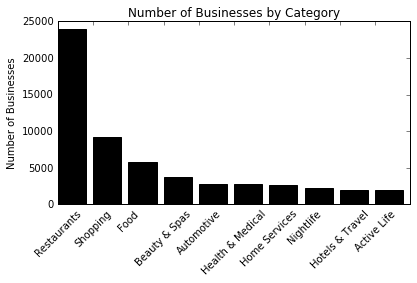

In [118]:
categories = total.groupby(by='category_main')

plt.bar(range(10),categories.size().sort_values(ascending=False).values[:10], color='black')
plt.xticks(range(10),categories.size().sort_values(ascending=False).index[:10], rotation=45)
plt.title('Number of Businesses by Category')
plt.ylabel('Number of Businesses')

ax = plt.gca()
pos1 = ax.get_position()
pos2 = [pos1.x0 + 0.02, pos1.y0 + 0.14, pos1.width + 0.04, pos1.height - 0.14]
ax.set_position(pos2)

plt.savefig('fig/by_category')

Number of Businesses by Rating:

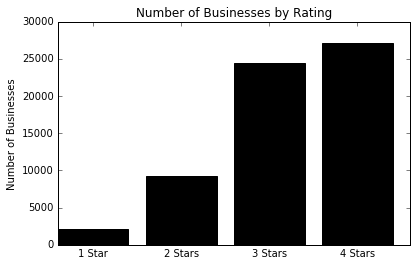

In [119]:
stars = total.groupby(by='stars_int').size()

plt.bar(range(4),stars.values, color='black')
plt.xticks(np.arange(0.4,4.4, 1), ['1 Star','2 Stars','3 Stars','4 Stars'])
plt.title('Number of Businesses by Rating')
plt.ylabel('Number of Businesses')

ax = plt.gca()
pos1 = ax.get_position()
pos2 = [pos1.x0 + 0.02, pos1.y0, pos1.width + 0.04, pos1.height]
ax.set_position(pos2)

plt.savefig('fig/by_stars')

Pickle if necessary

In [120]:
with open('pickle/total_clean_github.pickle', 'wb') as handle:
    pickle.dump(total, handle)